In [8]:
include("notebook_init.jl")

This notebook generates the figures in the paper 
_Complexity of Projected Gradient Methods for Strongly Convex Optimization with H{\"o}lder Continuous Gradient Terms_
by X. Chen, C. T. Kelley, and L. Wang

**Example 1**

Generate Figures 1(a), 1(b), 2(a), and 2(b). Theses figures are for Algorithm 1. Figures 1(a) and 2(a) compare various
stepsizes $\tau = \tau_0 h^2$ which are consistent with the CFL condition. Figures 1(b) and 2(b) examine values of the exponent $p$.

The files for building the figures are in __/src/Figures__. The code is __Figures_Alg1.jl__ and the functions __Figure1_2a__ and __Figure1_2b__. The functions take the dimension as an argument.

testing $\tau_0$. n=15, p=5.00000e-01


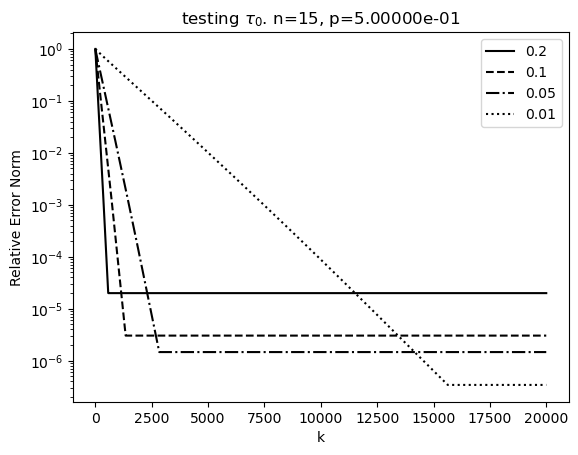

PyObject Text(0.5, 1.0, 'testing $\\tau_0$. n=15, p=5.00000e-01')

In [9]:
Figure1_2a(15)

We run this again with a problem size of 31x31. This requiers smaller stepsizes ans the Lipschitz constant increases by a factor of four.

testing $\tau_0$. n=31, p=5.00000e-01


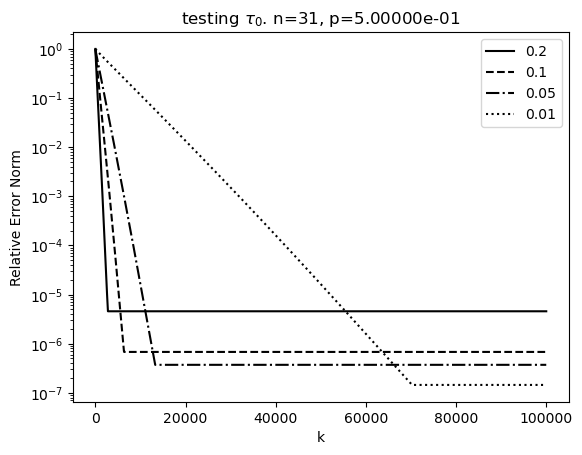

PyObject Text(0.5, 1.0, 'testing $\\tau_0$. n=31, p=5.00000e-01')

In [10]:
Figure1_2a(31)

Now we compare the effects of changing the exponent $p$.

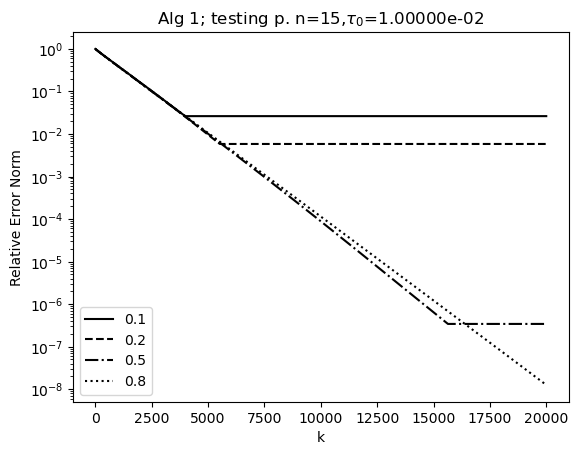

PyObject Text(0.5, 1.0, 'Alg 1; testing p. n=15,$\\tau_0$=1.00000e-02')

In [11]:
Figure1_2b(15)

And finally repeat the computation for a 31x32 grid. This will complete the computations for Example 1 + Algorithm 1.

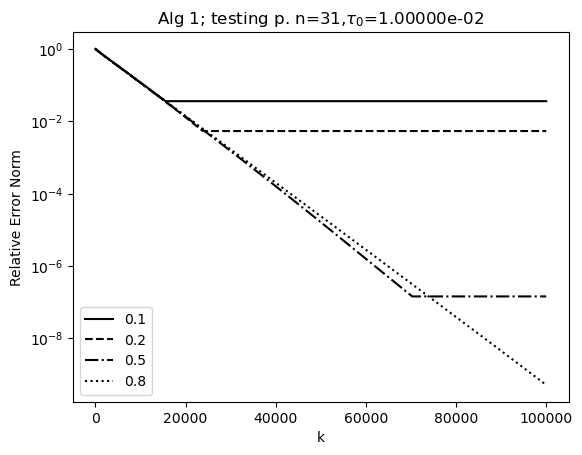

PyObject Text(0.5, 1.0, 'Alg 1; testing p. n=31,$\\tau_0$=1.00000e-02')

In [12]:
Figure1_2b(31)